In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [100]:
import os
folder_path = "/content/drive/MyDrive/Colab Notebooks/Social & Economic Indicators"

## Social Indicators

In [101]:
file_list = os.listdir(folder_path)
print(file_list)
csvs = []
for eachfile in file_list:
    if eachfile.endswith(".XLSX"):
       cleanfilename = eachfile.replace(".XLSX","")
       xlfile = pd.ExcelFile(eachfile)
       sheets = xlfile.sheet_names
       for eachsheet in sheets:
           sheetdata = xlfile.parse(eachsheet)
           csvname = cleanfilename + "-" + eachsheet + ".csv"
           sheetdata.to_csv(csvname,index = True)
           csvs.append(csvname)

['Statewise Total Population.XLSX', 'Statewise Sex Ratio.XLSX', 'Statewise Literacy Rate.XLSX', 'Statewise Gross Enrolment Ratio.XLSX', 'Statewise Birth Rate.XLSX', 'Statewise Infant Mortality Rate.XLSX', 'Statewise Life Expectancy.XLSX', 'Statewise Poverty Rate.XLSX', 'State-wise Average Inflation (CPI) - General.XLSX', 'State-wise Production of Total Foodgrains.XLSX', 'State-wise Number of Factories.XLSX', 'State-wise Health Infrastructure – Doctors and Specialists.XLSX']


In [102]:
csvs

['Statewise Total Population-T_1.csv',
 'Statewise Sex Ratio-T_5.csv',
 'Statewise Literacy Rate-Sheet1.csv',
 'Statewise Gross Enrolment Ratio-T_7.csv',
 'Statewise Gross Enrolment Ratio-T_7 (Concld.).csv',
 'Statewise Birth Rate-T_9.csv',
 'Statewise Birth Rate-T_9 (Concld.).csv',
 'Statewise Infant Mortality Rate-T_11.csv',
 'Statewise Infant Mortality Rate-T_11 (Concld.).csv',
 'Statewise Life Expectancy-T_14.csv',
 'Statewise Life Expectancy-T_14(i).csv',
 'Statewise Life Expectancy-T_14(ii).csv',
 'Statewise Life Expectancy-T_14(iii).csv',
 'Statewise Life Expectancy-T_14(iv).csv',
 'Statewise Life Expectancy-T_14(v).csv',
 'Statewise Life Expectancy-T_14(vi).csv',
 'Statewise Poverty Rate-T_17.csv',
 'Statewise Poverty Rate-T_17 (Concld.).csv',
 'State-wise Average Inflation (CPI) - General-T_106.csv',
 'State-wise Production of Total Foodgrains-T_64(i).csv',
 'State-wise Production of Total Foodgrains-T_64(ii).csv',
 'State-wise Number of Factories-T_114(i).csv',
 'State-wise N

# Population as an index:

In [5]:
population_data = pd.read_csv('Statewise Total Population-T_1.csv')
# Drop rows
population_data.drop([1,39,40,41,42,43,44,45], axis=0, inplace=True)
# Drop columns
population_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
# Drop duplicate rows
population_data = population_data.drop_duplicates()
# Fill missing values with a specific value
population_data = population_data.fillna(0)
population_data.columns = ['State/Union Territory', '1951', '1961','1971','1981','1991','2001','2011']
population_data

,State/Union Territory,1951,1961,1971,1981,1991,2001,2011
0,TABLE 1: STATE-WISE TOTAL POPULATION,0,0.0,0.0,0.0,0.0,0.0,0.0
2,State/Union Territory,1951,1961.0,1971.0,1981.0,1991.0,2001.0,2011.0
3,Andaman & Nicobar Islands,31,64.0,115.0,189.0,281.0,356.0,381.0
4,Andhra Pradesh,31115,35983.0,43503.0,53551.0,66508.0,76210.0,84581.0
5,Arunachal Pradesh,-,337.0,468.0,632.0,865.0,1098.0,1384.0
6,Assam,8029,10837.0,14625.0,18041.0,22414.0,26656.0,31206.0
7,Bihar,29085,34841.0,42126.0,52303.0,64531.0,82999.0,104099.0
8,Chandigarh,24,120.0,257.0,452.0,642.0,901.0,1055.0
9,Chhattisgarh,7457,9154.0,11637.0,14010.0,17615.0,20834.0,25545.0
10,Dadra & Nagar Haveli,42,58.0,74.0,104.0,138.0,220.0,344.0


In [6]:
population_data.describe()

,1961,1971,1981,1991,2001,2011
count,38.000000,38.000000,38.000000,38.000000,3.800000e+01,3.800000e+01
mean,23169.236842,28902.368421,36016.868421,44600.973684,5.419682e+04,6.378211e+04
std,71084.846563,88627.025585,110466.079810,136851.376484,1.664107e+05,1.959494e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,369.000000,483.000000,667.750000,941.250000,1.160500e+03,1.402750e+03
50%,3586.000000,4555.000000,6103.500000,8629.000000,1.199750e+04,1.466450e+04
75%,20513.750000,26464.250000,34218.000000,43332.000000,5.230600e+04,6.093125e+04
max,439235.000000,548160.000000,683329.000000,846421.000000,1.028737e+06,1.210855e+06


  State/Union Territory   1951     1961     1971     1981     1991     2001  \
4        Andhra Pradesh  31115  35983.0  43503.0  53551.0  66508.0  76210.0   

      2011  
4  84581.0  


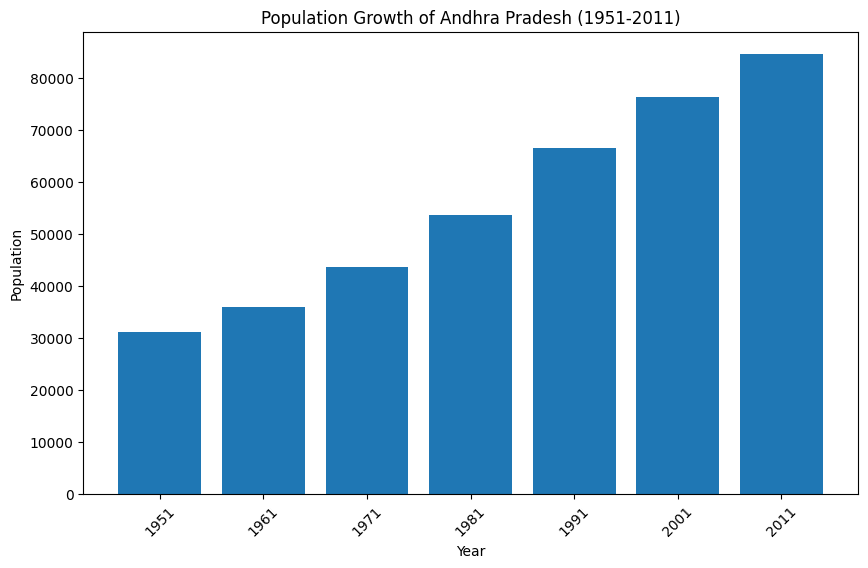

In [8]:
population_data = population_data.T
# Select only numeric columns
numeric_columns = population_data.select_dtypes(include=['number'])

pop1 = pd.DataFrame(population_data.loc[population_data['State/Union Territory']=="Andhra Pradesh"])
print(pop1)
pop1.iloc[:, 1:] = pop1.iloc[:, 1:].astype(int)
plt.figure(figsize=(10,6))
plt.bar(pop1.columns[1:], pop1.iloc[0, 1:])
plt.title('Population Growth of Andhra Pradesh (1951-2011)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

# SEX RATIO:

In [9]:
sexratio_data = pd.read_csv('Statewise Sex Ratio-T_5.csv')
# Drop rows
sexratio_data.drop([0,1,39,40], axis=0, inplace=True)
# Drop columns
sexratio_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
# Drop duplicate rows
sexratio_data = sexratio_data.drop_duplicates()
# Fill missing values with a specific value
sexratio_data = sexratio_data.fillna(0)
sexratio_data.columns = ['Females Per Thousand Males For different states/Ut', '1951', '1961','1971','1981','1991','2001','2011']
sexratio_data

,Females Per Thousand Males For different states/Ut,1951,1961,1971,1981,1991,2001,2011
2,State/Union Territory,1951,1961.0,1971.0,1981.0,1991.0,2001.0,2011.0
3,Andaman & Nicobar Islands,625,617.0,644.0,760.0,818.0,846.0,876.0
4,Andhra Pradesh,986,981.0,977.0,975.0,972.0,978.0,993.0
5,Arunachal Pradesh,-,894.0,861.0,862.0,859.0,893.0,938.0
6,Assam,868,869.0,896.0,910.0,923.0,935.0,958.0
7,Bihar,1000,1005.0,957.0,948.0,907.0,919.0,918.0
8,Chandigarh,781,652.0,749.0,769.0,790.0,777.0,818.0
9,Chhattisgarh,1024,1008.0,998.0,996.0,985.0,989.0,991.0
10,Dadra & Nagar Haveli,946,963.0,1007.0,974.0,952.0,812.0,774.0
11,Daman & Diu,1125,1169.0,1099.0,1062.0,968.0,710.0,618.0


In [10]:
sexratio_data.describe()

,1961,1971,1981,1991,2001,2011
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,962.000000,952.351351,955.594595,952.756757,949.405405,960.756757
std,195.953651,189.627005,185.096740,182.684215,189.699537,193.705160
min,617.000000,644.000000,760.000000,790.000000,710.000000,618.000000
25%,904.000000,878.000000,892.000000,896.000000,893.000000,912.000000
50%,940.000000,942.000000,940.000000,934.000000,934.000000,947.000000
75%,1005.000000,978.000000,975.000000,967.000000,968.000000,976.000000
max,1961.000000,1971.000000,1981.000000,1991.000000,2001.000000,2011.000000


   Females Per Thousand Males For different states/Ut 1951   1961   1971  \
15                                            Haryana  871  868.0  867.0   

     1981   1991   2001   2011  
15  870.0  865.0  861.0  879.0  


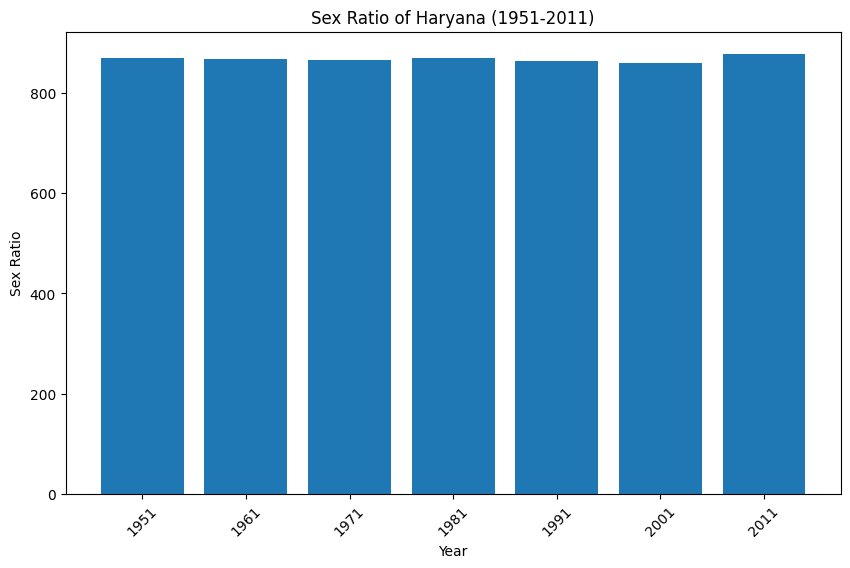

In [12]:
sexratio_data = sexratio_data.T
# Select only numeric columns
numeric_columns = sexratio_data.select_dtypes(include=['number'])

sexr1 = pd.DataFrame(sexratio_data.loc[sexratio_data['Females Per Thousand Males For different states/Ut']=="Haryana"])
print(sexr1)
sexr1.iloc[:, 1:] = sexr1.iloc[:, 1:].astype(int)
plt.figure(figsize=(10,6))
plt.bar(sexr1.columns[1:], sexr1.iloc[0, 1:])
plt.title('Sex Ratio of Haryana (1951-2011)')
plt.xlabel('Year')
plt.ylabel('Sex Ratio')
plt.xticks(rotation=45)
plt.show()

# Literacy rate:

In [13]:
literacy_data = pd.read_csv('Statewise Literacy Rate-Sheet1.csv')
# Drop rows
literacy_data.drop([0,1,2,39,40,41,42], axis=0, inplace=True)
# Drop columns
literacy_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
# Drop duplicate rows
literacy_data = literacy_data.replace('-',0)
literacy_data = literacy_data.drop_duplicates()
# Fill missing values with a specific value

literacy_data.columns = ['State/Union Territory', '1951', '1961','1971','1981','1991','2001','2011']
literacy_data

,State/Union Territory,1951,1961,1971,1981,1991,2001,2011
3,Andaman & Nicobar Islands,30.3,40.07,51.15,63.19,73.02,81.30,86.63
4,Andhra Pradesh,0,21.19,24.57,35.66,44.08,60.47,67.02
5,Arunachal Pradesh,0,7.13,11.29,25.55,41.59,54.34,65.39
6,Assam,18.53,32.95,33.94,0,52.89,63.25,72.19
7,Bihar,13.49,21.95,23.17,32.32,37.49,47.00,61.80
8,Chandigarh,0,0,70.43,74.8,77.81,81.94,86.05
9,Chhattisgarh,9.41,18.14,24.08,32.63,42.91,64.66,70.28
10,Dadra & Nagar Haveli,0,0,18.13,32.9,40.71,57.63,76.24
11,Daman & Diu,0,0,0,0,71.2,78.18,87.10
12,Delhi,0,61.95,65.08,71.94,75.29,81.67,86.21


In [14]:
literacy_data.describe()

,2001,2011
count,36.000000,36.000000
mean,69.429167,77.782500
std,10.644823,8.510701
min,47.000000,61.800000
25%,62.950000,71.712500
50%,68.725000,77.145000
75%,77.205000,85.900000
max,90.860000,94.000000


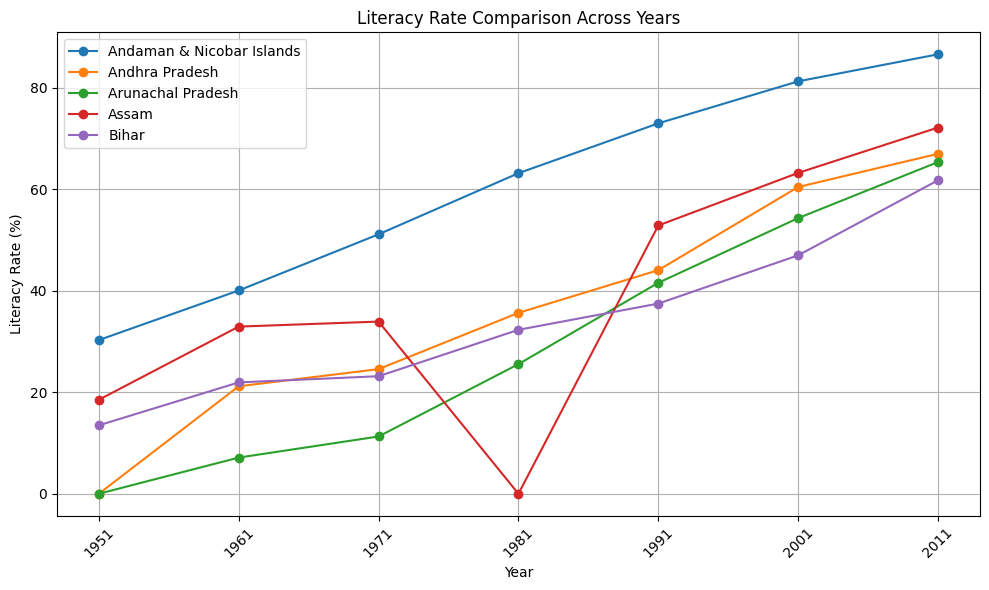

In [15]:

data = {
    'State/Union Territory': ['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar'],
    '1951': [30.3, 0, 0, 18.53, 13.49],
    '1961': [40.07, 21.19, 7.13, 32.95, 21.95],
    '1971': [51.15, 24.57, 11.29, 33.94, 23.17],
    '1981': [63.19, 35.66, 25.55, 0, 32.32],
    '1991': [73.02, 44.08, 41.59, 52.89, 37.49],
    '2001': [81.30, 60.47, 54.34, 63.25, 47.00],
    '2011': [86.63, 67.02, 65.39, 72.19, 61.80]
}

lit_for5 = pd.DataFrame(data)
lit_for5.set_index('State/Union Territory', inplace=True)

# Plot
plt.figure(figsize=(10, 6))
for state in lit_for5.index:
    plt.plot(lit_for5.columns, lit_for5.loc[state], marker='o', label=state)

plt.title('Literacy Rate Comparison Across Years')
plt.xlabel('Year')
plt.ylabel('Literacy Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gross-Enrollment Ratio:

In [16]:
# Load CSV files into DataFrames
ger1 = pd.read_csv('Statewise Gross Enrolment Ratio-T_7.csv')
ger2 = pd.read_csv('Statewise Gross Enrolment Ratio-T_7 (Concld.).csv')
# Load other CSV files as needed
# Merge DataFrames
ger_12 = pd.concat([ger1, ger2], axis=1,ignore_index=True)
# Drop duplicate rows
ger_12 = ger_12.drop_duplicates()
# Fill missing values with a specific value
ger_12 = ger_12.fillna(0)
# Drop rows with missing values
ger_12 = ger_12.dropna()
# Drop rows
ger_12.drop([0,1,2,36,37], axis=0, inplace=True)
# Drop columns
ger_12.drop([0, 1,12,13, 14],axis=1, inplace=True)

ger_12.columns = ['State-Wise Gross Enrollment ratio', 'Primary(1 to 5) Boys', 'Primary(1 to 5) Girls','Primary(1 to 5) Total','Upper Primary(6 to 8) Boys','Upper Primary(6 to 8) Girls','Upper Primary(6 to 8) Total','Elementary(1 to 8) Boys','Elementary(1 to 8) Girls','Elementary(1 to 8) Total','Secondary(9-10) Boys','Secondary(9-10) Girls','Secondary(9-10) Total','Higher Secondary(11-12) Boys','Higher Secondary(11-12) Girls','Higher Secondary(11-12) Total']
# Reset the index
ger_12 = ger_12.reset_index(drop=True)
ger_12.head(50)

,State-Wise Gross Enrollment ratio,Primary(1 to 5) Boys,Primary(1 to 5) Girls,Primary(1 to 5) Total,Upper Primary(6 to 8) Boys,Upper Primary(6 to 8) Girls,Upper Primary(6 to 8) Total,Elementary(1 to 8) Boys,Elementary(1 to 8) Girls,Elementary(1 to 8) Total,Secondary(9-10) Boys,Secondary(9-10) Girls,Secondary(9-10) Total,Higher Secondary(11-12) Boys,Higher Secondary(11-12) Girls,Higher Secondary(11-12) Total
0,Andaman and Nicobar Islands,66.3,69.4,67.8,70.8,72.2,71.5,68.1,70.5,69.2,65.1,72.7,68.6,62,70.2,65.8
1,Andhra Pradesh,101.7,101.6,101.6,100,95.2,97.6,101.1,99.1,100.1,86.3,84.5,85.4,55.2,58.3,56.7
2,Arunachal Pradesh,128.4,130.1,129.2,82.2,88.3,85.2,108.3,111.5,109.9,65,68.1,66.5,51.4,56.1,53.7
3,Assam,116.3,123.3,119.6,90.4,99.7,95,106.2,113.8,109.8,67.9,81.3,74.5,38,42.2,40.1
4,Bihar,101.2,103.9,102.5,84.8,87.1,86,95.1,97.4,96.2,63.1,66.8,64.9,35.6,36.2,35.9
5,Chandigarh,81.2,90.5,85.4,88.8,100.1,93.7,84.1,94.1,88.5,85.8,95.8,90.1,76.1,89.4,81.7
6,Chhattisgarh,96.5,96.7,96.6,94.3,94.7,94.6,95.7,96,95.9,75.3,81.4,78.3,62.9,73.6,68.1
7,Dadra & Nagar Haveli and Daman and Diu,87,91.7,89.1,89.3,92.5,90.8,87.8,92,89.8,71.9,79,75,44.7,70.8,54.9
8,Delhi,112.4,120.1,116,128.3,131.7,130,118.3,124.5,121.3,110.5,112.2,111.2,91.2,99.5,94.9
9,Goa,90.9,95,92.8,87.1,89.8,88.4,89.4,93,91.1,80.6,85.7,83,71.2,76.3,73.7


In [17]:
ger_12.describe()

,State-Wise Gross Enrollment ratio,Primary(1 to 5) Boys,Primary(1 to 5) Girls,Primary(1 to 5) Total,Upper Primary(6 to 8) Boys,Upper Primary(6 to 8) Girls,Upper Primary(6 to 8) Total,Elementary(1 to 8) Boys,Elementary(1 to 8) Girls,Elementary(1 to 8) Total,Secondary(9-10) Boys,Secondary(9-10) Girls,Secondary(9-10) Total,Higher Secondary(11-12) Boys,Higher Secondary(11-12) Girls,Higher Secondary(11-12) Total
count,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
unique,36,34,36,35,36,34,34,35,35,35,35,35,34,36,36,36
top,Andaman and Nicobar Islands,98.1,69.4,102.1,70.8,89.8,77.7,107.2,92,100.1,86.3,93.2,94.1,62,70.2,65.8
freq,1,2,1,2,1,2,2,2,2,2,2,2,2,1,1,1


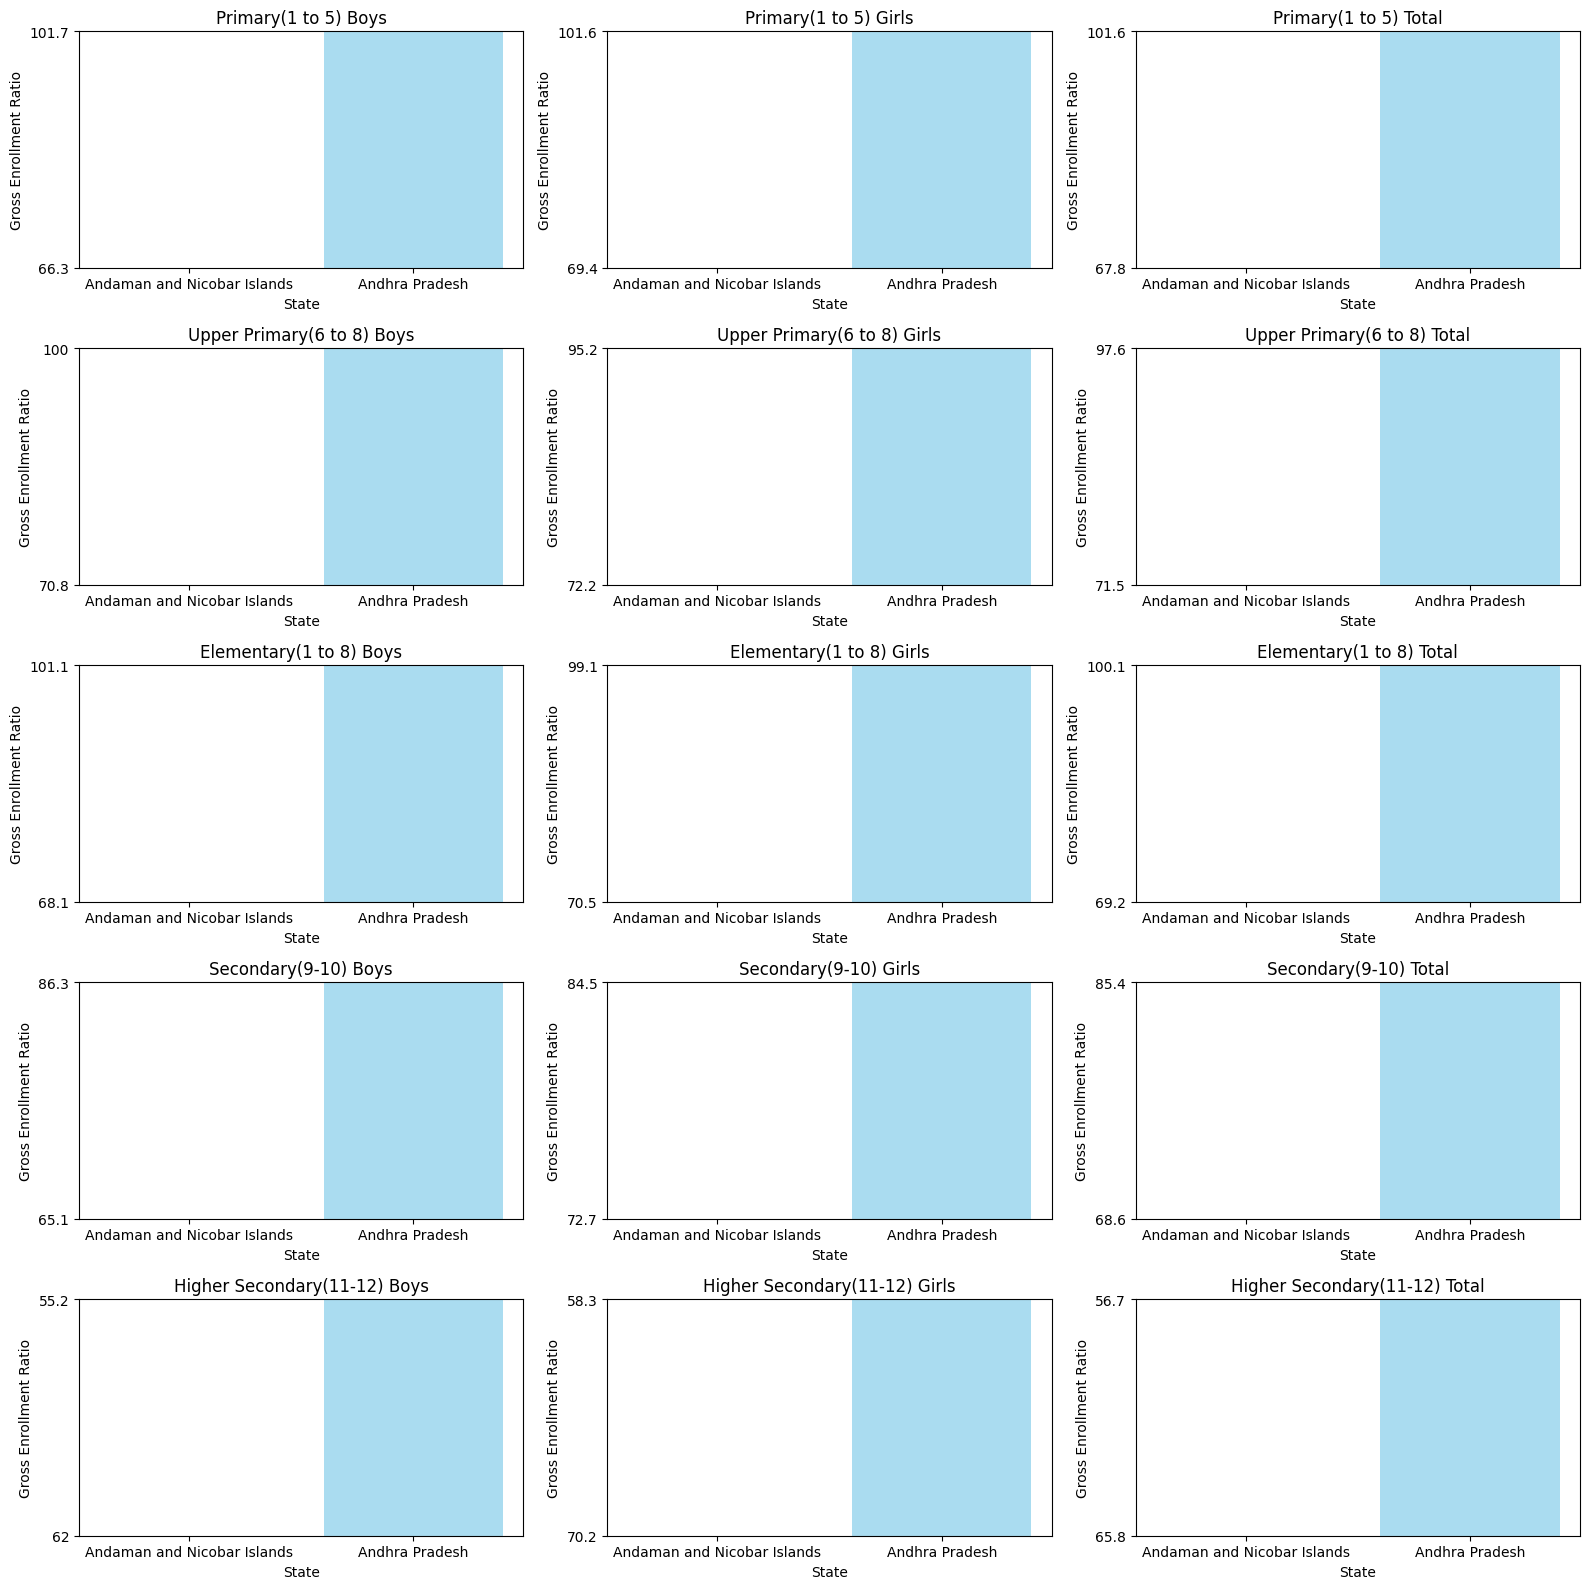

In [18]:
df = pd.DataFrame(ger_12.head(2))
df.set_index('State-Wise Gross Enrollment ratio', inplace=True)

# Plot
categories = ['Primary(1 to 5)', 'Upper Primary(6 to 8)', 'Elementary(1 to 8)', 'Secondary(9-10)', 'Higher Secondary(11-12)']
genders = ['Boys', 'Girls', 'Total']

fig, axes = plt.subplots(nrows=len(categories), ncols=len(genders), figsize=(16, 16))

for i, category in enumerate(categories):
    for j, gender in enumerate(genders):
        ax = axes[i, j]
        ax.bar(df.index, df[f'{category} {gender}'], color='skyblue', alpha=0.7)
        ax.set_title(f'{category} {gender}')
        ax.set_ylabel('Gross Enrollment Ratio')
        ax.set_xlabel('State')
        ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Life-Expectancy

In [19]:
 # Load CSV files into DataFrames
le_12 = pd.read_csv('Statewise Life Expectancy-T_14(vi).csv')
# Drop rows
le_12.drop([0,1,2], axis=0, inplace=True)
# Drop columns
le_12.drop(['Unnamed: 0.1',	'Unnamed: 0'], axis=1, inplace=True)
# Drop rows with missing values
le_12 = le_12.dropna()
# Fill missing values with a specific value
le_12 = le_12.fillna(0)
le_12.columns = ['State-Wise Life Expectancy (Years)', '2016-20 Male', '2016-20 Female','2016-20 Total']

# Print the modified DataFrame
le_12 = le_12.reset_index(drop=True)
le_12.head(40)

,State-Wise Life Expectancy (Years),2016-20 Male,2016-20 Female,2016-20 Total
0,Andhra Pradesh,69.1,72.2,70.6
1,Assam,67.3,68.6,67.9
2,Bihar,69.7,69.2,69.5
3,Chhattisgarh,63.5,66.8,65.1
4,Delhi,74.1,77.7,75.8
5,Gujarat,68.1,73.2,70.5
6,Haryana,67.3,73,69.9
7,Himachal Pradesh,70.3,77.5,73.5
8,Jammu & Kashmir,72.6,76.3,74.3
9,Jharkhand,70.5,68.9,69.6


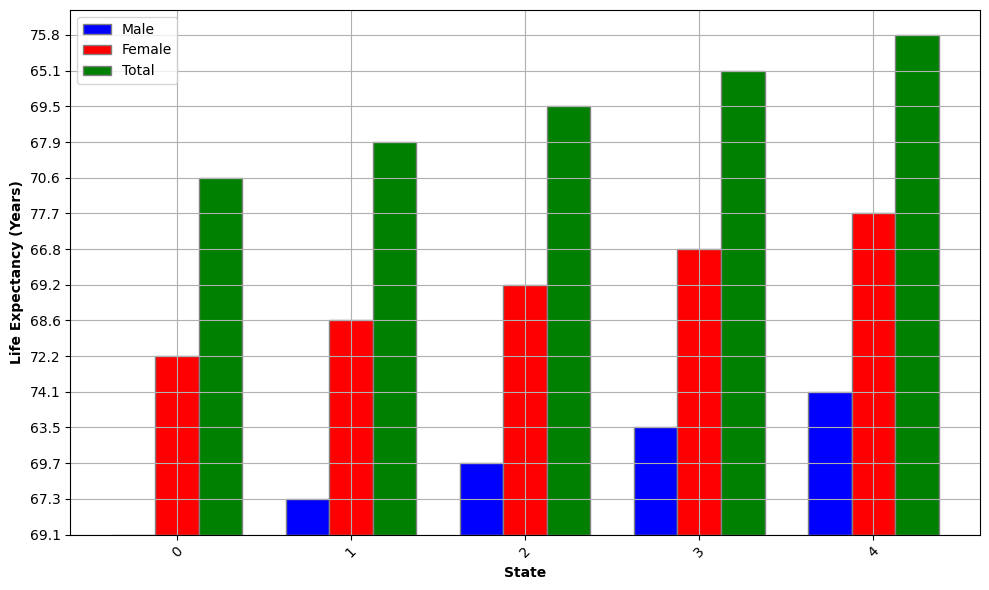

In [20]:
le = le_12.head()
# Plot
plt.figure(figsize=(10, 6))

# Set positions for bars
bar_width = 0.25
r1 = range(len(le))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot bars
plt.bar(r1, le['2016-20 Male'], color='b', width=bar_width, edgecolor='grey', label='Male')
plt.bar(r2, le['2016-20 Female'], color='r', width=bar_width, edgecolor='grey', label='Female')
plt.bar(r3, le['2016-20 Total'], color='g', width=bar_width, edgecolor='grey', label='Total')

# Add xticks on the middle of the group bars
plt.xlabel('State', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(le))], le.index, rotation=45)

# Add y label
plt.ylabel('Life Expectancy (Years)', fontweight='bold')

# Create legend & Show graphic
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [91]:
#le_12.drop(['2016-20 Male','2016-20 Female'], axis=1, inplace=True)
le_12.columns = ['State/Union Territory','Life Expectancy']
le_12

,State/Union Territory,Life Expectancy
0,Andhra Pradesh,70.6
1,Assam,67.9
2,Bihar,69.5
3,Chhattisgarh,65.1
4,Delhi,75.8
5,Gujarat,70.5
6,Haryana,69.9
7,Himachal Pradesh,73.5
8,Jammu & Kashmir,74.3
9,Jharkhand,69.6


# Infant Mortality Rate

In [21]:
infant_tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_Indian_states_by_infant_mortality_rate')
len(infant_tables)

2

In [26]:
infant_table = pd.DataFrame(infant_tables[1])
infant_table.drop(0,axis=0,inplace=True)
infant_table.columns = ['Rank','State','Infant mortality per 1000(2019)','Infant mortality per 1000(2015)','Comparable country']
infant_table.drop(['Rank','Comparable country'],axis=1,inplace=True)
infant_table.at[5,'State'] = 'Andaman & Nicobar Island'
infant_table.at[11,'State'] = 'Dadara & Nagar Havelli'
infant_table.at[18,'State'] = 'Jammu & Kashmir'
infant_table.at[10,'State'] = 'NCT of Delhi'
infant_table.at[28,'State'] = 'Arunanchal Pradesh'
infant_table

,State,Infant mortality per 1000(2019),Infant mortality per 1000(2015)
1,Nagaland,3,12
2,Mizoram,3,32
3,Sikkim,5,18
4,Kerala,6,12
5,Andaman & Nicobar Island,7,20
6,Goa,8,9
7,Lakshadweep,8,20
8,Puducherry,9,11
9,Manipur,10,9
10,NCT of Delhi,11,18


In [23]:
shp_gdf = gpd.read_file('/content/states_india.geojson')
shp_gdf

,cartodb_id,state_code,st_nm,geometry
0,1,0,Telangana,"MULTIPOLYGON (((78.34088 19.88361, 78.35133 19..."
1,2,35,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
2,3,28,Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33381, 81.39224 16..."
3,4,12,Arunanchal Pradesh,"MULTIPOLYGON (((96.16261 29.38078, 96.16860 29..."
4,5,18,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
5,6,10,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
6,8,22,Chhattisgarh,"MULTIPOLYGON (((83.33532 24.09885, 83.35346 24..."
7,10,25,Daman & Diu,"MULTIPOLYGON (((72.89334 20.44539, 72.89281 20..."
8,11,30,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,12,24,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [27]:
merged2 = shp_gdf.set_index('st_nm').join(infant_table.set_index('State'))
merged2.drop(['cartodb_id','state_code'],axis=1,inplace=True)
merged2

,geometry,Infant mortality per 1000(2019),Infant mortality per 1000(2015)
st_nm,,,
Telangana,"MULTIPOLYGON (((78.34088 19.88361, 78.35133 19...",23.0,34.0
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",7.0,20.0
Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33381, 81.39224 16...",25.0,37.0
Arunanchal Pradesh,"MULTIPOLYGON (((96.16261 29.38078, 96.16860 29...",29.0,30.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",40.0,47.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",29.0,42.0
Chhattisgarh,"MULTIPOLYGON (((83.33532 24.09885, 83.35346 24...",40.0,41.0
Daman & Diu,"MULTIPOLYGON (((72.89334 20.44539, 72.89281 20...",NaN,NaN
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",8.0,9.0


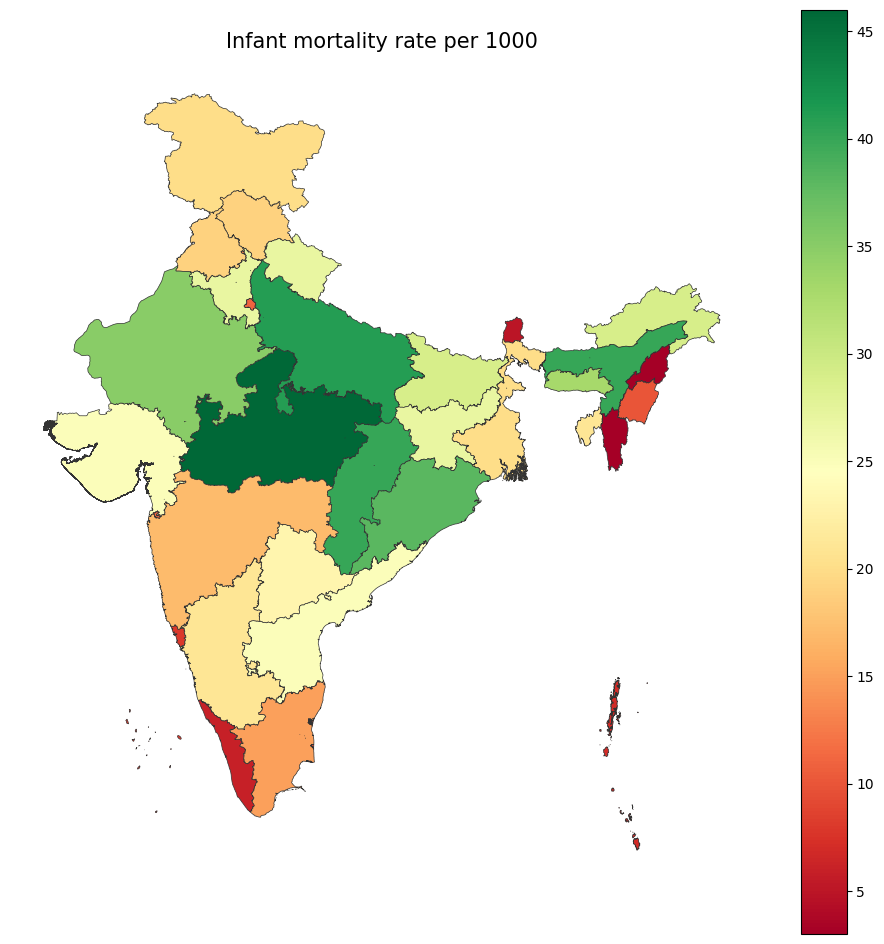

In [28]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Infant mortality rate per 1000',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged2.plot('Infant mortality per 1000(2019)', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

# State-wise Health Infrastructure – Doctors and Specialists

In [111]:
health_wise = pd.read_csv('/content/State-wise Health Infrastructure – Doctors and Specialists-T_22(x).csv')
health_wise.drop(['Unnamed: 0.1',	'Unnamed: 0','Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4','Unnamed: 5'], axis=1,inplace=True)
health_wise.drop([0,1,2,3,4,42,43,44,45,46,47,48,49],axis=0,inplace=True)
health_wise.columns = ['State/Union Territory','Shortfall']
health_wise = health_wise.reset_index(drop=True)
health_wise['Shortfall'] = health_wise['Shortfall'].str.replace('.', '0')
health_wise['Shortfall'] = health_wise['Shortfall'].astype(int)
health_wise.at[31,'State/Union Territory'] = 'NCT of Delhi'
health_wise

,State/Union Territory,Shortfall
0,Andhra Pradesh,292
1,Arunachal Pradesh,217
2,Assam,509
3,Bihar,754
4,Chhattisgarh,602
5,Goa,22
6,Gujarat,1249
7,Haryana,483
8,Himachal Pradesh,354
9,Jharkhand,477


In [112]:
merg_health = shp_gdf.set_index('st_nm').join(health_wise.set_index('State/Union Territory'))
merg_health.drop(['cartodb_id','state_code'],axis=1,inplace=True)
merg_health

,geometry,Shortfall
st_nm,,
Telangana,"MULTIPOLYGON (((78.34088 19.88361, 78.35133 19...",14.0
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33381, 81.39224 16...",292.0
Arunanchal Pradesh,"MULTIPOLYGON (((96.16261 29.38078, 96.16860 29...",NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",509.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",754.0
Chhattisgarh,"MULTIPOLYGON (((83.33532 24.09885, 83.35346 24...",602.0
Daman & Diu,"MULTIPOLYGON (((72.89334 20.44539, 72.89281 20...",NaN
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",22.0


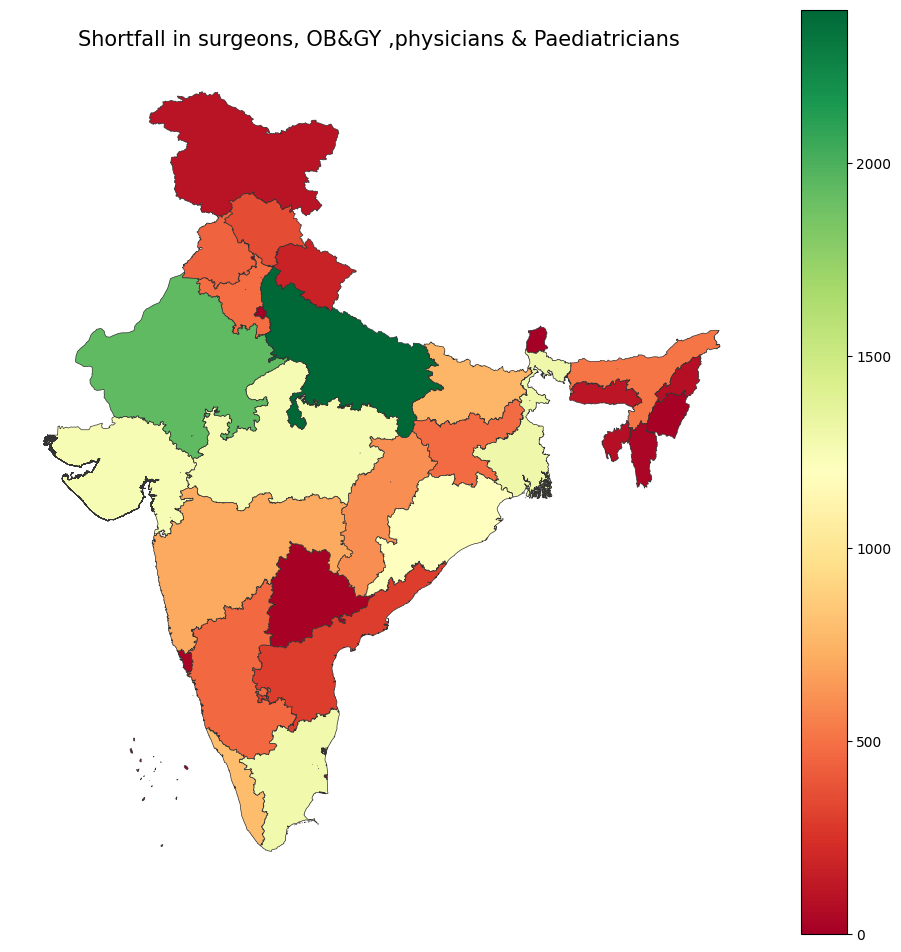

In [113]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Shortfall in surgeons, OB&GY ,physicians & Paediatricians ',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merg_health.plot('Shortfall', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

# State-wise Average Inflation (CPI)

In [117]:
inflation = pd.read_csv('/content/State-wise Average Inflation (CPI) - General-T_106.csv')
inflation.drop(['Unnamed: 0.1',	'Unnamed: 0','Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4','Unnamed: 5','Unnamed: 6',	'Unnamed: 7',	'Unnamed: 8',	'Unnamed: 9'], axis=1,inplace=True)
inflation.drop([0,1,2,4,42,39,40,41,42],axis=0,inplace=True)
inflation.columns = ['State/Union Territory','State-wise Average Inflation (CPI)']
inflation = inflation.reset_index(drop=True)
#inflation['Shortfall'] = inflation['Shortfall'].str.replace('.', '0')
#health_wise['Shortfall'] = health_wise['Shortfall'].astype(int)
inflation.at[7,'State/Union Territory'] = 'NCT of Delhi'
inflation

,State/Union Territory,State-wise Average Inflation (CPI)
0,Andaman & Nicobar Islands,6.1
1,Assam,6.5
2,Bihar,5.7
3,Chandigarh,5.9
4,Chhattisgarh,4.7
5,Dadra & Nagar Haveli,6.4
6,Daman & Diu,5.6
7,NCT of Delhi,4
8,Goa,3.2
9,Gujarat,6.9


In [118]:
merg_inflation = shp_gdf.set_index('st_nm').join(inflation.set_index('State/Union Territory'))
merg_inflation.drop(['cartodb_id','state_code'],axis=1,inplace=True)
merg_inflation

,geometry,State-wise Average Inflation (CPI)
st_nm,,
Telangana,"MULTIPOLYGON (((78.34088 19.88361, 78.35133 19...",8.6
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33381, 81.39224 16...",NaN
Arunanchal Pradesh,"MULTIPOLYGON (((96.16261 29.38078, 96.16860 29...",NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",6.5
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",5.7
Chhattisgarh,"MULTIPOLYGON (((83.33532 24.09885, 83.35346 24...",4.7
Daman & Diu,"MULTIPOLYGON (((72.89334 20.44539, 72.89281 20...",5.6
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",3.2


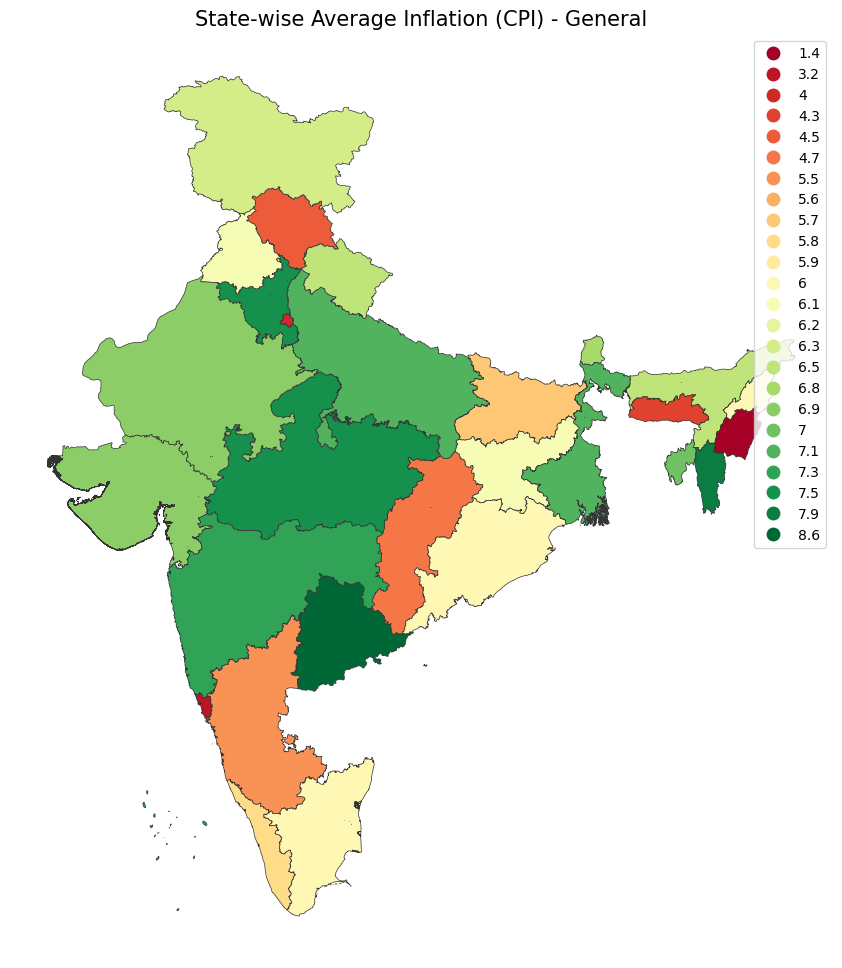

In [120]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('State-wise Average Inflation (CPI) - General',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merg_inflation.plot('State-wise Average Inflation (CPI)', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

# Total Production Of Food Grains

In [125]:
food_grains = pd.read_csv('/content/State-wise Production of Total Foodgrains-T_64(ii).csv')
food_grains.drop(['Unnamed: 0.1',	'Unnamed: 0','Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4','Unnamed: 5','Unnamed: 6',	'Unnamed: 7',	'Unnamed: 8',	'Unnamed: 9','Unnamed: 11'], axis=1,inplace=True)
food_grains.drop([0,1,2,34,35,36,37,38],axis=0,inplace=True)
food_grains.columns = ['State/Union Territory','Production of Total Foodgrains']
food_grains = food_grains.reset_index(drop=True)
food_grains.at[1,'State/Union Territory'] = 'Arunanchal Pradesh'
food_grains

,State/Union Territory,Production of Total Foodgrains
0,Andhra Pradesh,11076.5
1,Arunanchal Pradesh,388.2
2,Assam,4677.7
3,Bihar,17018.2
4,Chhattisgarh,9023.6
5,NCT of Delhi,107.2
6,Goa,93.5
7,Gujarat,10130.7
8,Haryana,16329.7
9,Himachal Pradesh,1606.5


In [126]:
merg_food = shp_gdf.set_index('st_nm').join(food_grains.set_index('State/Union Territory'))
merg_food.drop(['cartodb_id','state_code'],axis=1,inplace=True)
merg_food

,geometry,Production of Total Foodgrains
st_nm,,
Telangana,"MULTIPOLYGON (((78.34088 19.88361, 78.35133 19...",15348.8
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33381, 81.39224 16...",11076.5
Arunanchal Pradesh,"MULTIPOLYGON (((96.16261 29.38078, 96.16860 29...",388.2
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",4677.7
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",17018.2
Chhattisgarh,"MULTIPOLYGON (((83.33532 24.09885, 83.35346 24...",9023.6
Daman & Diu,"MULTIPOLYGON (((72.89334 20.44539, 72.89281 20...",NaN
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",93.5


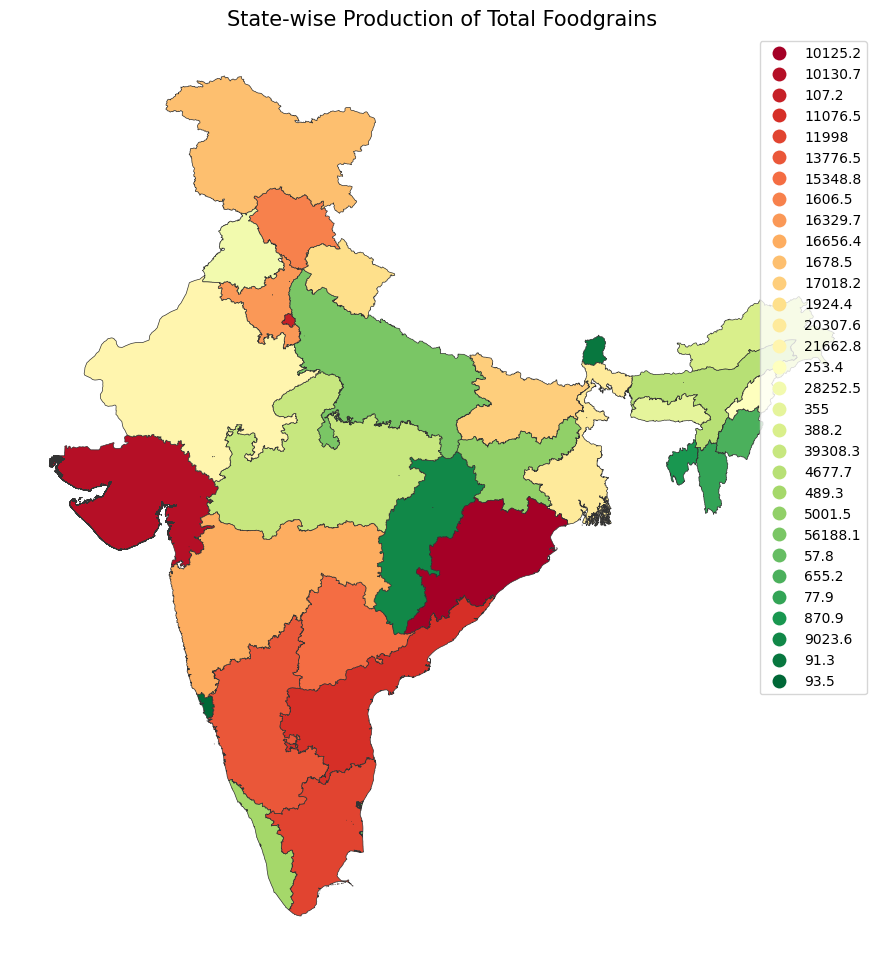

In [127]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('State-wise Production of Total Foodgrains',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merg_food.plot('Production of Total Foodgrains', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

# Human Development Index

In [29]:
hdis = pd.read_html('https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_Human_Development_Index')
len(hdis)

8

In [30]:
hdi = pd.DataFrame(hdis[1])
hdi.columns = ['Rank','State/Union Territory',	'HDI (2021)','Country comparison']
hdi.drop(['Rank','Country comparison'],axis =1 , inplace = True)
hdi.drop([8,25],axis=0,inplace=True)
hdi = hdi.reset_index(drop=True)
hdi.at[3,'State/Union Territory']='NCT of Delhi'
hdi.at[8,'State/Union Territory']='Jammu & Kashmir'
hdi.at[18,'State/Union Territory']='Arunanchal Pradesh'
hdi

,State/Union Territory,HDI (2021)
0,Kerala,0.752
1,Goa,0.751
2,Chandigarh,0.744
3,NCT of Delhi,0.730
4,Puducherry,0.726
5,Lakshadweep,0.715
6,Himachal Pradesh,0.703
7,Sikkim,0.702
8,Jammu & Kashmir,0.699
9,Punjab,0.694


In [31]:
merg_hdi = shp_gdf.set_index('st_nm').join(hdi.set_index('State/Union Territory'))
merg_hdi.drop(['cartodb_id','state_code'],axis=1,inplace=True)
merg_hdi

,geometry,HDI (2021)
st_nm,,
Telangana,"MULTIPOLYGON (((78.34088 19.88361, 78.35133 19...",0.647
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33381, 81.39224 16...",0.630
Arunanchal Pradesh,"MULTIPOLYGON (((96.16261 29.38078, 96.16860 29...",0.665
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",0.597
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",0.571
Chhattisgarh,"MULTIPOLYGON (((83.33532 24.09885, 83.35346 24...",0.605
Daman & Diu,"MULTIPOLYGON (((72.89334 20.44539, 72.89281 20...",NaN
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",0.751


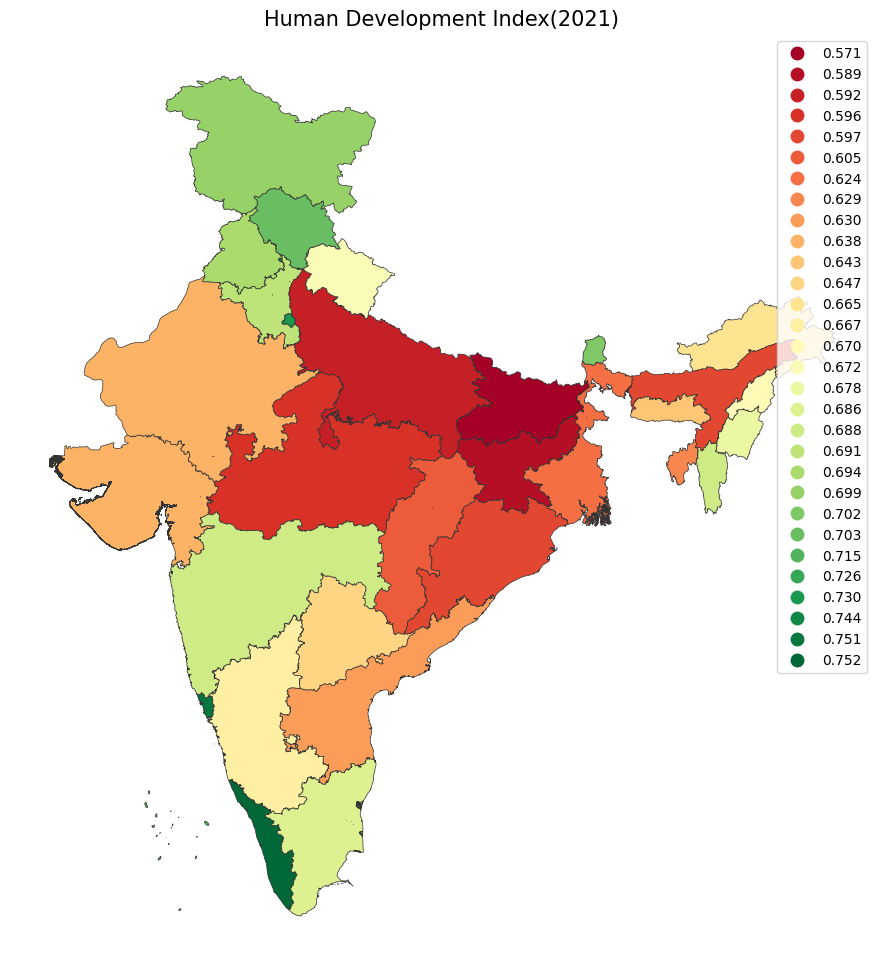

In [32]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Human Development Index(2021)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merg_hdi.plot(column='HDI (2021)', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

# Poverty Rate

In [82]:
#por1 = pd.read_csv('Statewise Poverty Rate-T_17.csv')
por2 = pd.read_csv('Statewise Poverty Rate-T_17 (Concld.).csv')
# Drop rows
por2.drop([0,1,2], axis=0, inplace=True)
# Drop columns
por2.drop(['Unnamed: 0.1'	,'Unnamed: 0'], axis=1, inplace=True)
# Drop rows with missing values
por2 = por2.dropna()
# Fill missing values with a specific value
por2 = por2.fillna(0)
por2.columns = ['STATE-WISE POVERTY RATE(Person in Lakh)', '2004-05 (Based on MRP Consumption) No. of Persons', '2004-05 (Based on MRP Consumption) Percentage','2009-10 (Based on MRP Consumption) No. of Persons','2009-10 (Based on MRP Consumption) Percentage','2011-12 (Based on MRP Consumption) No. of Persons','2011-12 (Based on MRP Consumption) Percentag']
por2 = por2.reset_index(drop=True)
por2.head()


,STATE-WISE POVERTY RATE(Person in Lakh),2004-05 (Based on MRP Consumption) No. of Persons,2004-05 (Based on MRP Consumption) Percentage,2009-10 (Based on MRP Consumption) No. of Persons,2009-10 (Based on MRP Consumption) Percentage,2011-12 (Based on MRP Consumption) No. of Persons,2011-12 (Based on MRP Consumption) Percentag
0,Andhra Pradesh,238.8,29.9,176.6,21.1,78.8,9.2
1,Arunachal Pradesh,3.6,31.1,3.5,25.9,4.9,34.7
2,Assam,97.3,34.4,116.4,37.9,101.3,32
3,Bihar,485.6,54.4,543.5,53.5,358.2,33.7
4,Chhattisgarh,109.9,49.4,121.9,48.7,104.1,39.9


In [83]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_poverty_rate')

In [84]:
len(tables)

3

In [85]:
pov = pd.DataFrame(tables[1])
pov.drop([0,20,30],axis=0,inplace=True)
pov.drop('Unnamed: 0_level_0',axis=1,inplace=True)
pov = pov.reset_index(drop=True)
pov.columns = ['State/Union Territory','% of population State/UT specific poverty line (2019-21) Rural','% of population State/UT specific poverty line (2019-21) Urban','% of population living below the Multidimensional Poverty Index in 2023']
pov.drop(['% of population State/UT specific poverty line (2019-21) Rural','% of population State/UT specific poverty line (2019-21) Urban'],axis=1,inplace=True)
pov.at[33,'State/Union Territory']='Jammu & Kashmir'
pov.at[16,'State/Union Territory']='Arunanchal Pradesh'
pov.at[34,'State/Union Territory']='NCT of Delhi'
pov


<ipython-input-85-b22af1a6da1a>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pov.drop('Unnamed: 0_level_0',axis=1,inplace=True)


,State/Union Territory,% of population living below the Multidimensional Poverty Index in 2023
0,Goa,0.37
1,Kerala,0.48
2,Tamil Nadu,1.43
3,Sikkim,2.10
4,Telangana,3.76
5,Mizoram,3.77
6,Himachal Pradesh,3.88
7,Andhra Pradesh,4.19
8,Punjab,4.35
9,Haryana,5.30


In [86]:
shp_gdf = gpd.read_file('/content/states_india.geojson')
shp_gdf.head()

,cartodb_id,state_code,st_nm,geometry
0,1,0,Telangana,"MULTIPOLYGON (((78.34088 19.88361, 78.35133 19..."
1,2,35,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
2,3,28,Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33381, 81.39224 16..."
3,4,12,Arunanchal Pradesh,"MULTIPOLYGON (((96.16261 29.38078, 96.16860 29..."
4,5,18,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."


In [87]:
merged = shp_gdf.set_index('st_nm').join(pov.set_index('State/Union Territory'))
merged.drop(['cartodb_id','state_code'],axis=1,inplace=True)
merged

,geometry,% of population living below the Multidimensional Poverty Index in 2023
st_nm,,
Telangana,"MULTIPOLYGON (((78.34088 19.88361, 78.35133 19...",3.76
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33381, 81.39224 16...",4.19
Arunanchal Pradesh,"MULTIPOLYGON (((96.16261 29.38078, 96.16860 29...",10.05
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",14.47
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",26.59
Chhattisgarh,"MULTIPOLYGON (((83.33532 24.09885, 83.35346 24...",11.71
Daman & Diu,"MULTIPOLYGON (((72.89334 20.44539, 72.89281 20...",NaN
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",0.37


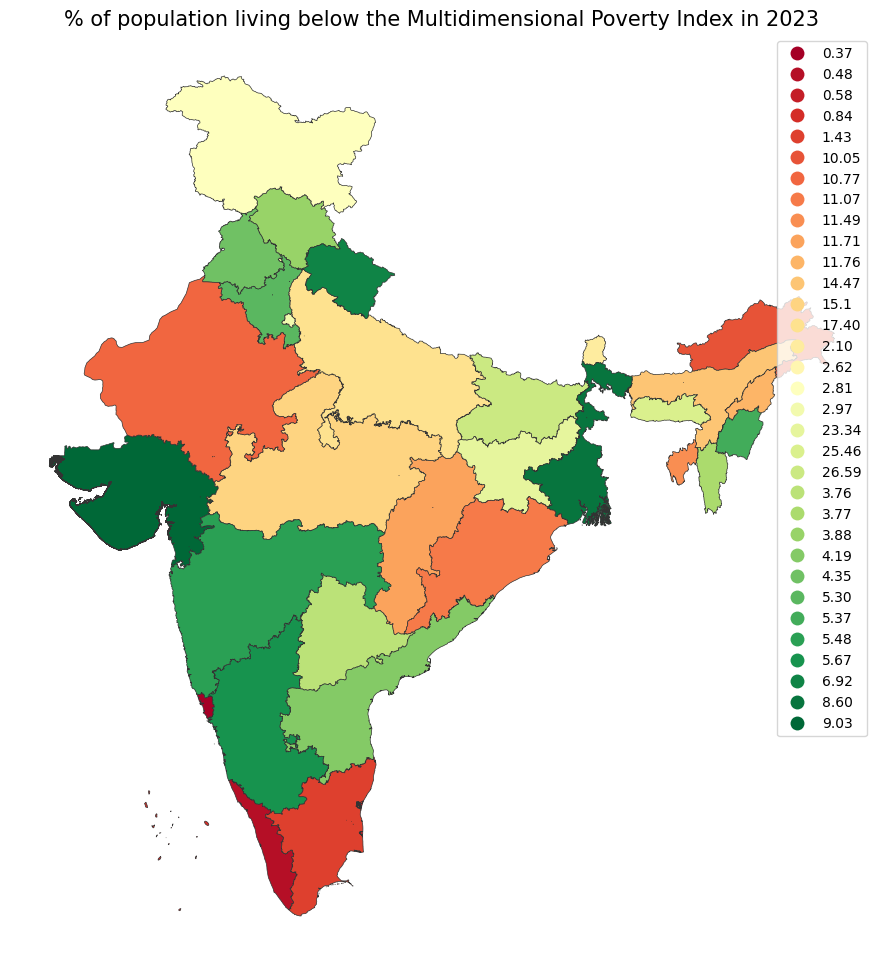

In [88]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('% of population living below the Multidimensional Poverty Index in 2023',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='% of population living below the Multidimensional Poverty Index in 2023', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [93]:
pov.columns = ['State/Union Territory','Poverty Rate']
pov

,State/Union Territory,Poverty Rate
0,Goa,0.37
1,Kerala,0.48
2,Tamil Nadu,1.43
3,Sikkim,2.10
4,Telangana,3.76
5,Mizoram,3.77
6,Himachal Pradesh,3.88
7,Andhra Pradesh,4.19
8,Punjab,4.35
9,Haryana,5.30


# UNEMPLOYMENT RATE:

In [77]:
ump_rates = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_unemployment_rate')
ump_rate = pd.DataFrame(ump_rates[2])
# Replace NaN values with zero
ump_rate['Unemployment rate (%)'] = ump_rate['Unemployment rate (%)'].fillna(0).astype(int)
ump_rate.columns = ['State/Union Territory','Unemployment Rate']
ump_rate.at[10,'State/Union Territory'] = 'Jammu & Kashmir'
ump_rate.at[5,'State/Union Territory'] = 'NCT of Delhi'
ump_rate.at[1,'State/Union Territory'] = 'Arunanchal Pradesh'
ump_rate

,State/Union Territory,Unemployment Rate
0,Andhra Pradesh,4
1,Arunanchal Pradesh,18
2,Assam,0
3,Bihar,11
4,Chhattisgarh,0
5,NCT of Delhi,9
6,Goa,10
7,Gujarat,1
8,Haryana,22
9,Himachal Pradesh,9


In [78]:
merg_ump = shp_gdf.set_index('st_nm').join(ump_rate.set_index('State/Union Territory'))
merg_ump.drop(['cartodb_id','state_code'],axis=1,inplace=True)
merg_ump

,geometry,Unemployment Rate
st_nm,,
Telangana,"MULTIPOLYGON (((78.34088 19.88361, 78.35133 19...",8.0
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33381, 81.39224 16...",4.0
Arunanchal Pradesh,"MULTIPOLYGON (((96.16261 29.38078, 96.16860 29...",18.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",0.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",11.0
Chhattisgarh,"MULTIPOLYGON (((83.33532 24.09885, 83.35346 24...",0.0
Daman & Diu,"MULTIPOLYGON (((72.89334 20.44539, 72.89281 20...",NaN
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",10.0


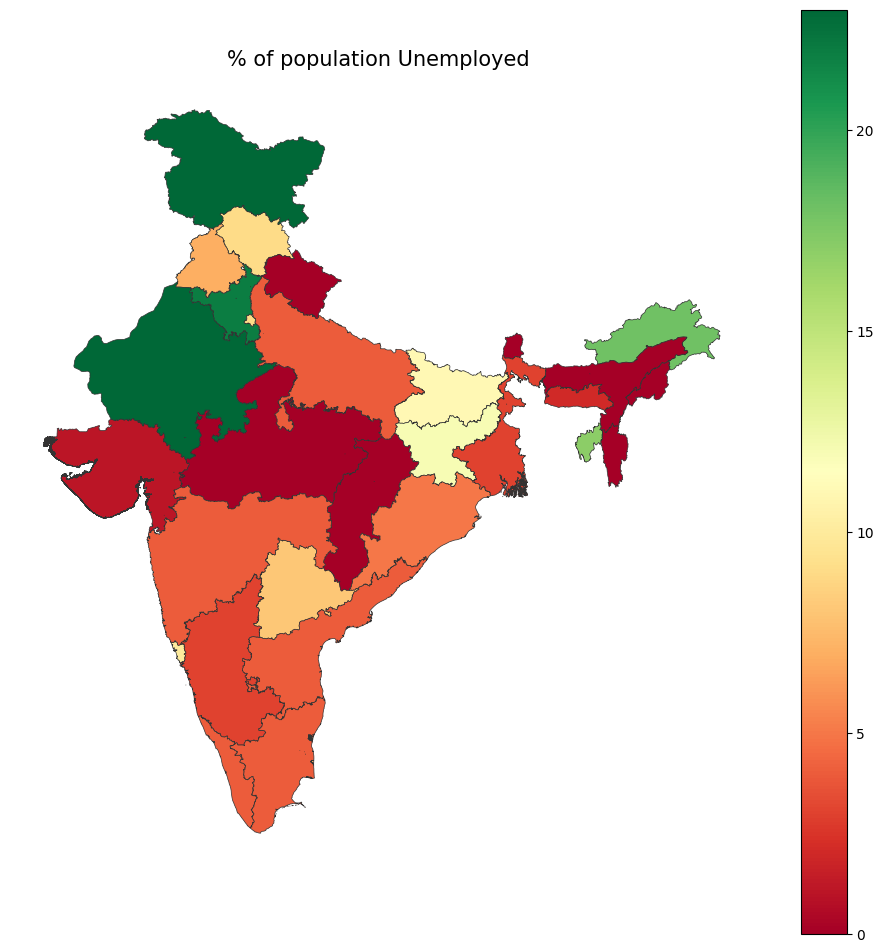

In [79]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('% of population Unemployed ',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merg_ump.plot(column='Unemployment Rate', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

#**GDP** PER CAPITA


In [49]:
gdp_tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDP_per_capita')

In [50]:
gdp_table = pd.DataFrame(gdp_tables[1])

In [51]:
#gdp_table.drop(['Rank','2021–2022 (USD)'],axis=1,inplace=True)
gdp_table.at[26,'State/Union territory'] = 'Jammu & Kashmir'
gdp_table.at[2,'State/Union territory'] = 'NCT of Delhi'
gdp_table

,Rank,State/Union territory,2021–22 (INR),2021–2022 (USD)
0,1,Goa,"₹472,070","$6,215"
1,2,Sikkim,"₹463,509","$6,102"
2,3,NCT of Delhi,"₹389,529","$5,128"
3,4,Chandigarh,"₹333,932","$4,396"
4,5,Telangana,"₹270,839","$3,566"
5,6,Karnataka,"₹265,623","$3,497"
6,7,Haryana,"₹264,835","$3,487"
7,8,Puducherry,"₹251,344","$3,309"
8,9,Tamil Nadu,"₹242,253","$3,189"
9,10,Gujarat,"₹241,930","$3,185"


In [52]:
merged1 = shp_gdf.set_index('st_nm').join(gdp_table.set_index('State/Union territory'))
merged1.drop(['cartodb_id','state_code'],axis=1,inplace=True)
merged1

,geometry,Rank,2021–22 (INR),2021–2022 (USD)
st_nm,,,,
Telangana,"MULTIPOLYGON (((78.34088 19.88361, 78.35133 19...",5,"₹270,839","$3,566"
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN,NaN,NaN
Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33381, 81.39224 16...",18,"₹192,587","$2,535"
Arunanchal Pradesh,"MULTIPOLYGON (((96.16261 29.38078, 96.16860 29...",NaN,NaN,NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",29,"₹102,965","$1,356"
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",33,"₹47,498",$625
Chhattisgarh,"MULTIPOLYGON (((83.33532 24.09885, 83.35346 24...",27,"₹120,704","$1,589"
Daman & Diu,"MULTIPOLYGON (((72.89334 20.44539, 72.89281 20...",NaN,NaN,NaN
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",1,"₹472,070","$6,215"


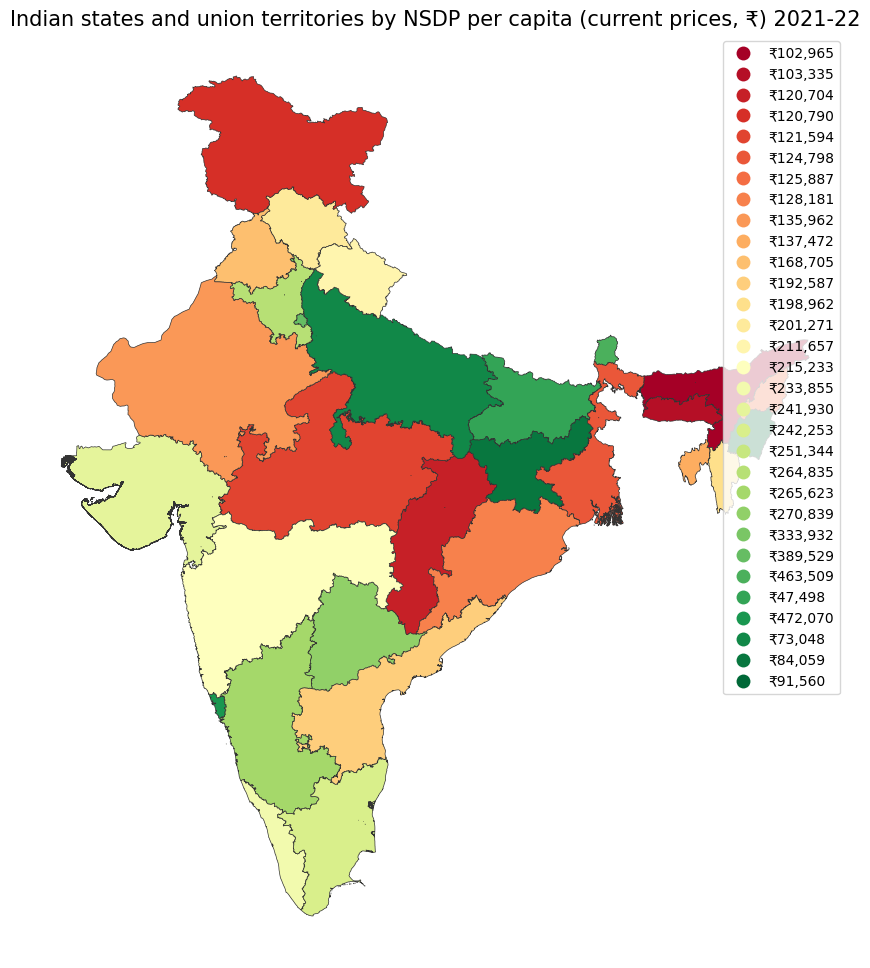

In [53]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Indian states and union territories by NSDP per capita (current prices, ₹) 2021-22',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged1.plot(column='2021–22 (INR)', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [54]:
gdp_table1 = pd.DataFrame(gdp_tables[2])
gdp_table1.fillna(0)
gdp_table1 = gdp_table1.replace('NaN','0')
gdp_table1.drop(['Rank','2011–12[2][3]','2012–13[2]','2013–14[2]','2014–15[2]',	'2015–16[2]',	'2016–17[2]','2017–18[2]',	'2018–19[2]',	'2020–21[4]','2022–23[4]'],axis=1,inplace=True)
gdp_table1

,State/Union territory,2021–22[4]
0,Sikkim,"₹472,543"
1,Goa,"₹472,070"
2,Delhi,"₹389,529"
3,Chandigarh,"₹349,373"
4,Telangana,"₹265,942"
5,Karnataka,"₹265,623"
6,Haryana,"₹264,835"
7,Tamil Nadu,"₹241,131"
8,Gujarat,"₹250,100"
9,Maharastra,"₹215,233"


In [56]:
# Remove the common substring from the specified column
gdp_table1['2021–22[4]'] = gdp_table1['2021–22[4]'].str.replace(' ', '').str.replace('₹', '').str.replace(',', '')
# Replace NaN values with zero
gdp_table1['2021–22[4]'] = gdp_table1['2021–22[4]'].fillna(0).astype(int)
# Convert the column to integer
gdp_table1['2021–22[4]'] = gdp_table1['2021–22[4]'].astype(int)
gdp_table1.columns = ['State/Union Territory','2021-22[4]']
gdp_table1

,State/Union Territory,2021-22[4]
0,Sikkim,472543
1,Goa,472070
2,Delhi,389529
3,Chandigarh,349373
4,Telangana,265942
5,Karnataka,265623
6,Haryana,264835
7,Tamil Nadu,241131
8,Gujarat,250100
9,Maharastra,215233


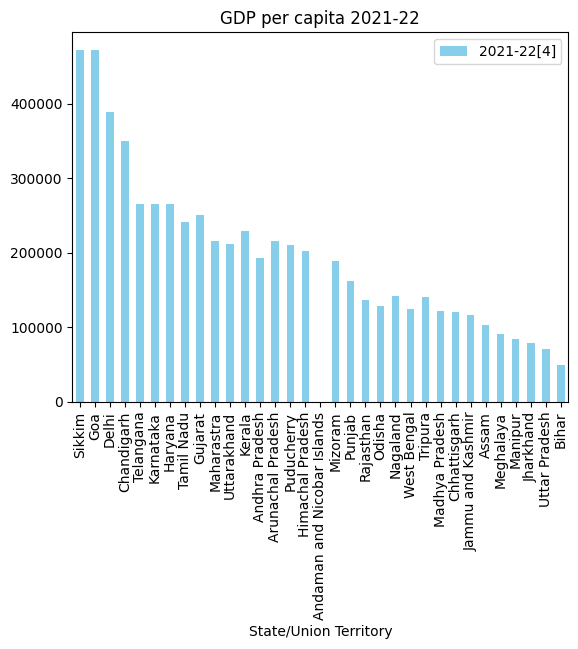

<Figure size 1200x900 with 0 Axes>

In [137]:

gdp_table1.plot(kind='bar', x='State/Union Territory', y='2021-22[4]', color='skyblue')
plt.title('GDP per capita 2021-22')
plt.figure(figsize=(12,9))
#plt.xlabel('State')
#plt.ylabel('GDP per capita for each state')
#plt.xticks(rotation=45)
#plt.figure(figsize=(12,9))
plt.show()

# Regression Analysis

In [68]:
regress = pd.merge(literacy_data, hdi, on='State/Union Territory', how='inner')
regress.drop(['1951','1961','1971','1981','1991','2001'],axis=1,inplace=True)
regress.columns = ['State/Union Territory','Literacy rate','HDI']
regress = pd.merge(regress,gdp_table1,on='State/Union Territory', how='inner')
regress.columns = ['State','Literacy rate','HDI','GDP']
regress


,State,Literacy rate,HDI,GDP
0,Andhra Pradesh,67.02,0.630,192587
1,Assam,72.19,0.597,102965
2,Bihar,61.80,0.571,49470
3,Chandigarh,86.05,0.744,349373
4,Chhattisgarh,70.28,0.605,120704
5,Goa,88.70,0.751,472070
6,Gujarat,78.03,0.638,250100
7,Haryana,75.55,0.691,264835
8,Himachal Pradesh,82.80,0.703,201854
9,Jharkhand,66.41,0.589,78660


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(regress[['Literacy rate','HDI']])

# Create DataFrame of scaled features
scaled_df = pd.DataFrame(scaled_features, columns=['Scaled Literacy rate','Scaled HDI'])

# Concatenate scaled features with the target variable
preprocessed_data = pd.concat([regress['State'], scaled_df, regress['GDP']], axis=1)

# Split data into features and target variable
X = preprocessed_data.drop(['State', 'GDP'], axis=1)  # Features
y = preprocessed_data['GDP']                          # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

# Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print('\nCoefficients:')
print(coefficients)

Mean Squared Error: 13873158477.716364
R-squared: 0.1894129621498467

Coefficients:
                       Coefficient
Scaled Literacy rate   3178.945404
Scaled HDI            80770.014955


# CLUSTER ANALYSIS

In [128]:
cluster = pd.merge(literacy_data, hdi, on='State/Union Territory', how='inner')
cluster.drop(['1951','1961','1971','1981','1991','2001'],axis=1,inplace=True)
cluster.columns = ['State/Union Territory','Literacy rate','HDI']
cluster = pd.merge(cluster, ump_rate, on='State/Union Territory', how='inner')
cluster = pd.merge(cluster, pov, on='State/Union Territory', how='inner')
cluster = pd.merge(cluster, le_12 , on='State/Union Territory', how='inner')
cluster = pd.merge(cluster, gdp_table1 , on='State/Union Territory', how='inner')
cluster = pd.merge(cluster, health_wise , on='State/Union Territory', how='inner')
cluster = pd.merge(cluster, inflation , on='State/Union Territory', how='inner')
cluster = pd.merge(cluster, food_grains , on='State/Union Territory', how='inner')
cluster.columns = ['State/Union Territory',	'Literacy rate',	'HDI',	'Unemployment Rate','Poverty Rate',	'Life Expectancy','GDP','Shortfall',	'Inflation (CPI)','Production of Total Foodgrains']
cluster

,State/Union Territory,Literacy rate,HDI,Unemployment Rate,Poverty Rate,Life Expectancy,GDP,Shortfall,Inflation (CPI),Production of Total Foodgrains
0,Assam,72.19,0.597,0,14.47,67.9,102965,509,6.5,4677.7
1,Bihar,61.80,0.571,11,26.59,69.5,49470,754,5.7,17018.2
2,Chhattisgarh,70.28,0.605,0,11.71,65.1,120704,602,4.7,9023.6
3,Gujarat,78.03,0.638,1,9.03,70.5,250100,1249,6.9,10130.7
4,Haryana,75.55,0.691,22,5.30,69.9,264835,483,7.5,16329.7
5,Himachal Pradesh,82.80,0.703,9,3.88,73.5,201854,354,4.5,1606.5
6,Jharkhand,66.41,0.589,12,23.34,69.6,78660,477,6.1,5001.5
7,Karnataka,75.37,0.667,3,5.67,69.8,265623,465,5.5,13776.5
8,Kerala,94.00,0.752,4,0.48,75,228767,796,5.8,489.3
9,Madhya Pradesh,69.32,0.596,0,15.1,67.4,121594,1262,7.5,39308.3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


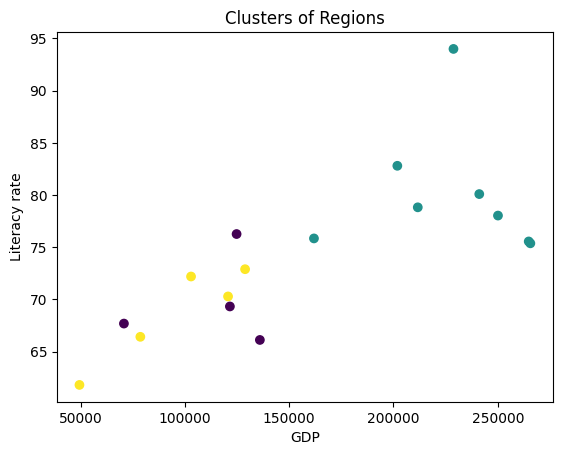

In [129]:
from sklearn.cluster import KMeans
# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster.drop('State/Union Territory', axis=1))

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # You can choose the number of clusters
kmeans.fit(scaled_features)

# Add cluster labels to the DataFrame
cluster['Cluster'] = kmeans.labels_

# Visualize clusters
plt.scatter(cluster['GDP'], cluster['Literacy rate'], c=cluster['Cluster'], cmap='viridis')
plt.xlabel('GDP')
plt.ylabel('Literacy rate')
plt.title('Clusters of Regions')
plt.show()